Assignment 9

Date: 10/09/24

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, log_loss
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [8]:
data = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.30, random_state=42, shuffle=False)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
print("The last training sample is of digit", y_train.iloc[-1])

The last training sample is of digit 6


In [23]:
X_train_69 = np.concatenate((X_train[y_train == '6'], X_train[y_train == '9']))
y_train_69 = np.concatenate((np.ones(len(X_train[y_train == '6'])), np.zeros(len(X_train[y_train == '9']))))

X_train_69, y_train_69 = shuffle(X_train_69, y_train_69, random_state=1729)

X_test_69 = np.concatenate((X_test[y_test == '6'], X_test[y_test == '9']))
y_test_69 = np.concatenate((np.ones(len(X_test[y_test == '6'])), np.zeros(len(X_test[y_test == '9']))))

X_test_69, y_test_69 = shuffle(X_test_69, y_test_69, random_state=1729)

Sum of all the labels in the vector y_train_69: 4855.0
Sum of all the labels in the vector y_test_69: 2021.0


In [25]:
sum_y_train_69 = np.sum(y_train_69)
print("Sum of vector y_train_69:", sum_y_train_69)

sum_y_test_69 = np.sum(y_test_69)
print("Sum of y_test_69:", sum_y_test_69)

Sum of vector y_train_69: 4855.0
Sum of y_test_69: 2021.0


In [27]:
scaler = StandardScaler()
X_train_69Tf = scaler.fit_transform(X_train_69)

In [29]:
#What is the mean of the zeroth sample?* What is the mean of zeroth feature?* What is the standard deviation of the zeroth sample?* What is the standard deviation of the zeroth feature?

mean_sample_0 = np.mean(X_train_69Tf[0])
mean_feature_0 = np.mean(X_train_69Tf[:, 0])
std_sample_0 = np.std(X_train_69Tf[0])
std_feature_0 = np.std(X_train_69Tf[:, 0])
tupl = (mean_sample_0, mean_feature_0, std_sample_0, std_feature_0)
print(tupl)

(0.08128379559427823, 0.0, 0.7358823226037738, 0.0)


In [44]:
clf_1 = SGDClassifier(loss='log_loss', penalty=None, random_state=10, max_iter=10, learning_rate='constant', eta0=0.01)
loss_1 = []
for i in range(10):
    clf_1.partial_fit(X_train_69Tf, y_train_69, classes=np.unique(y_train_69))
    loss_1.append(log_loss(y_train_69, clf_1.decision_function(X_train_69Tf)))

In [47]:
clf_2 = SGDClassifier(loss='log_loss', penalty=None, random_state=10, max_iter=10, learning_rate='constant', eta0=0.000001)
loss_2 = []
for i in range(10):
    clf_2.partial_fit(X_train_69Tf, y_train_69, classes=np.unique(y_train_69))
    loss_2.append(log_loss(y_train_69, clf_2.decision_function(X_train_69Tf)))

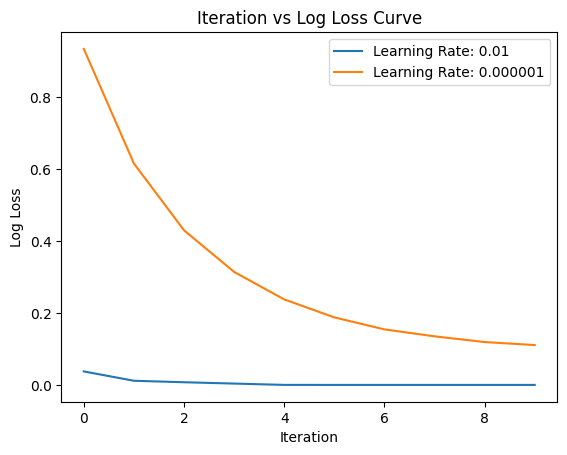

In [48]:
plt.plot(loss_1, label='Learning Rate: 0.01')
plt.plot(loss_2, label='Learning Rate: 0.000001')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Iteration vs Log Loss Curve')
plt.legend()
plt.show()
#The iteration vs loss curve decreases monotonically for setting A (learning rate = 0.01).

QUESTION 9B

In [51]:
#Before flatenning
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


In [59]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
# Normalizing
X_train = X_train/255
X_test = X_test/255

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(49000, 784)
(21000, 784)
(49000,)
(21000,)


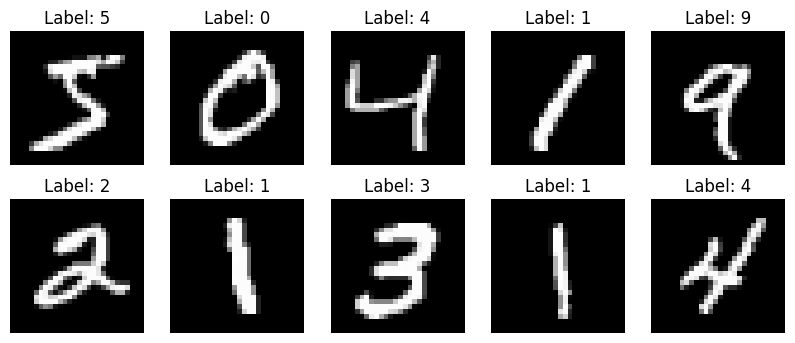

In [60]:
def plot_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('off')
    plt.show()

plot_samples(X_train, y_train)

In [61]:
# Consider the first 10,000 images in training dataset and first 2,000 images in testing dataset
X_train_subset = X_train[:10000]
y_train_subset = y_train[:10000]
X_test_subset = X_test[:2000]
y_test_subset = y_test[:2000]

pipe_1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='linear', C=1))
])

pipe_1.fit(X_train_subset, y_train_subset.ravel())

acc = cross_val_score(pipe_1, X_train_subset, y_train_subset.ravel(), cv=2)
print("Training Accuracy (Linear SVM): {:.2f} %".format(acc.mean() * 100))

Training Accuracy (Linear SVM): 91.07 %


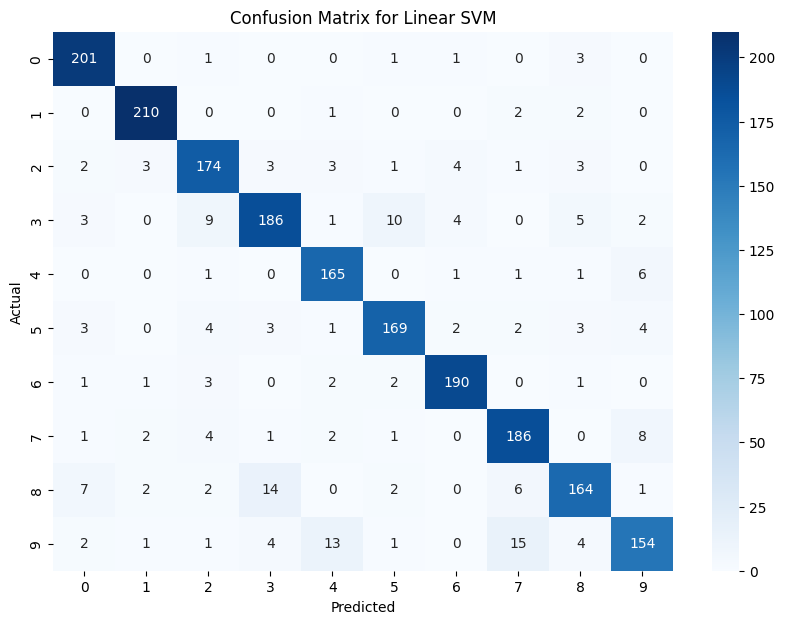

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       207
           1       0.96      0.98      0.97       215
           2       0.87      0.90      0.89       194
           3       0.88      0.85      0.86       220
           4       0.88      0.94      0.91       175
           5       0.90      0.88      0.89       191
           6       0.94      0.95      0.95       200
           7       0.87      0.91      0.89       205
           8       0.88      0.83      0.85       198
           9       0.88      0.79      0.83       195

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [62]:
y_pred = pipe_1.predict(X_test_subset)

cm = confusion_matrix(y_test_subset, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Linear SVM')
plt.show()

print(classification_report(y_test_subset, y_pred))

In [63]:
pipe_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))
])

pipe_2.fit(X_train_subset, y_train_subset.ravel())

acc = cross_val_score(pipe_2, X_train_subset, y_train_subset.ravel(), cv=2)
print("Training Accuracy (Nonlinear SVM): {:.2f} %".format(acc.mean() * 100))

Training Accuracy (Nonlinear SVM): 82.87 %


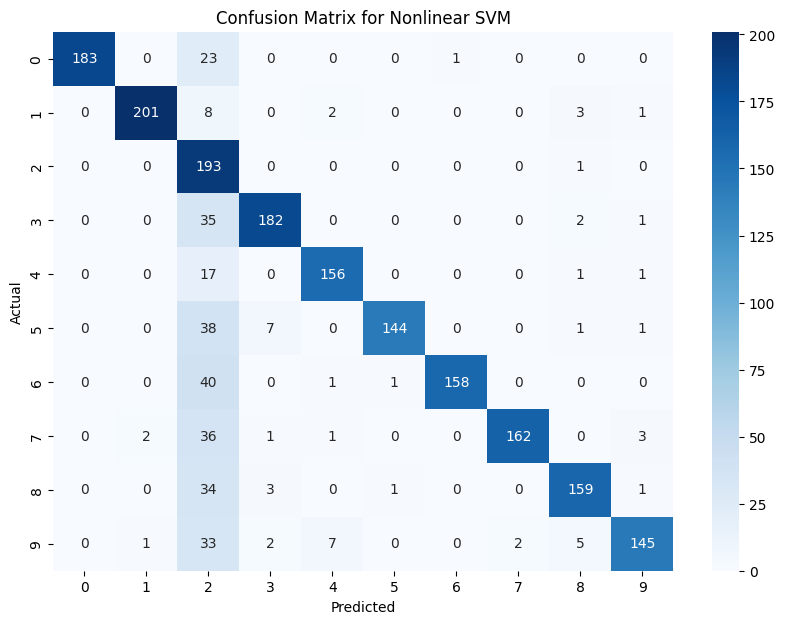

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       207
           1       0.99      0.93      0.96       215
           2       0.42      0.99      0.59       194
           3       0.93      0.83      0.88       220
           4       0.93      0.89      0.91       175
           5       0.99      0.75      0.85       191
           6       0.99      0.79      0.88       200
           7       0.99      0.79      0.88       205
           8       0.92      0.80      0.86       198
           9       0.95      0.74      0.83       195

    accuracy                           0.84      2000
   macro avg       0.91      0.84      0.86      2000
weighted avg       0.91      0.84      0.86      2000



In [64]:
y_pred_nonlinear = pipe_2.predict(X_test_subset)

cm_nonlinear = confusion_matrix(y_test_subset, y_pred_nonlinear)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nonlinear, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Nonlinear SVM')
plt.show()

print(classification_report(y_test_subset, y_pred_nonlinear))

In [65]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipe_2, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_subset, y_train_subset.ravel())

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'classifier__C': 10, 'classifier__gamma': 0.01}
